In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize


In [4]:
tpf = np.load("variablestar_tpf.npy")
tpf_re = tpf.reshape((tpf.shape[0], 50*50)).T

for i in range(0,2500):
    tpf_re[i] = (tpf_re[i] - np.mean(tpf_re[i])) / np.std(tpf_re[i])

In [5]:
np.savetxt("normalised.txt", tpf_re)

In [49]:
x = np.zeros((50, 50))
x[25, 25] = 1
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(50, 50))

In [52]:
x.reshape(50*50)[1275]

np.float64(1.0)

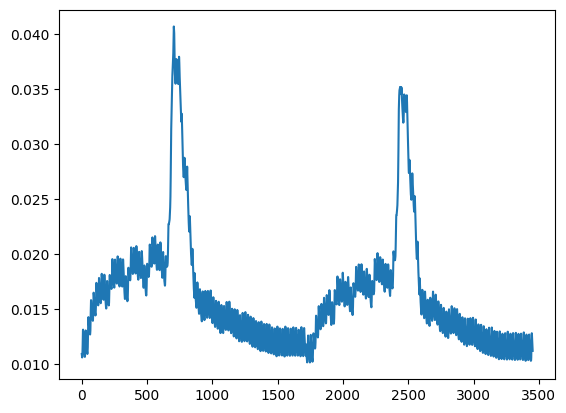

In [53]:
plt.plot(tpf_re.T[:, 1275])